In [67]:
# R Program session info
sessionInfo()

# Know your current working directory
getwd()

R version 4.0.2 (2020-06-22)
Platform: i386-w64-mingw32/i386 (32-bit)
Running under: Windows 10 x64 (build 19041)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_4.0.2  ellipsis_0.3.1  IRdisplay_0.7.0 pbdZMQ_0.3-3   
 [5] tools_4.0.2     htmltools_0.5.0 pillar_1.4.6    base64enc_0.1-3
 [9] crayon_1.3.4    uuid_0.1-4      IRkernel_1.1.1  jsonlite_1.7.0 
[13] digest_0.6.25   lifecycle_0.2.0 repr_1.1.0      rlang_0.4.7    
[17] evaluate_0.14  

[1] "C:/Users/ccoro/GIT/ProblemSets/2020-ps-MzCorona"

# Week 6, Introduction to Soil Moisture Storage with R


#### SETTING THE STAGE
During the __week 3 lesson__ we learned that precipitation that falls to the ground may infiltrate the surface and flow downward through the unsaturated zone until eventually reaching the water table __(figure below).__ Extreme precipitation events can reach the water table very quickly, causing the water table to rise and usually recharging aquifers. 

More often than not however, water travels very slowly downward through the unsaturated zone. Depending on the local hydrogeology, _water can remain in the unsaturated zone for hundreds to tens of thousands of years_ before reaching the water table! 

In this week's lesson, we will learn about what water that is stored in the unsaturated zone is called and how it can change with time and precipitation patterns.


### LEARNING GOALS

After doing this exercise, you should be able to:

- Describe what can happen to pore spaces in the unsaturated zone during heavy rainfall vs. prolonged dry periods.
- Define soil water storage.

- Define the purpose of a `function` such that you can create your own.
- Demonstrate plotting of four lines on a R plot. Oh my!


### PREREQUISITES

Before doing this exercise, you should know/review:

Basic Hydrology
- The difference between the unsaturated (vadose) zone and saturated zone.
- The difference between varying soil textures such as clay, silt, loam, sand.
- Water Year (WY), example: October 1st, 2000 - September 30th, 2001 represents WY2001. 

Beginner Programming Skills
- How to comment and uncomment code for use.
- Refreshing the kernel, running code from the top of the page.
- Know how to access text and csv files for use.
- Know how to plot one line.


### BACKGROUND

![Subsurface_Profile.PNG](Subsurface_Profile.PNG)

The unsaturated zone is an overlooked, but important reservoir for storing water. In the unsaturated zone, the open spaces between soil grains (see figure below) are occupied by water and air. The proportion of water and air in these soil pore spaces varies temporally, spatially and by the local soil type.

After a large rain event, pore spaces in the unsaturated zone may rapidly filled with more water, thereby decreasing the air-filled pore spaces.

During prolonged periods of dry conditions, more air may enter the pore spaces due to water in the soil being lost to soil evaporation and plant transpiration of deep roots.

The amount of water stored in soil is dynamic: it can vary temporally and spatially in response to changes in climate, land-use and soil properties. Scientists studying this important reservoir refer to the amount of water stored in the soil as soil water storage (SWS). See the figure below.

![Soil_Water_Storage.png](Soil_Water_Storage.png)

The agricultural industry and irrigation managers use field equipment like soil moisture probes to monitor the soil water storage down to a meter depth. This is the preferred depth for monitoring changes as a result of root zone processes for agricultural production. Agricultural practices have greatly improved over the last few decades thanks in part to scientists studying the mechanisms that affect soil water storage.

Subsurface hydrologists may also be interested in studying soil water storage, but the interest lies far deeper, ranging from several more meters to hundreds, depending on the depth to the water table. It is difficult to study soil water storage past the first meter of soil without digging expensive giant holes into the ground-- it is not cost-effective. For this and many other reasons, subsurface hydrologists employ computer subsurface flow models to study what soil water storage may look like at varying depths. 

#### We will be working with model output of soil water storage for water years (WY) 2013, 2014, 2016 and 2017. 

- The output is from a computer program that simulates the vertical downward movement of water in a one-dimensional space. The volume will also be one-dimensional (meters)

## Let's plot the soil water storage (SWS) for WY 2013 and 2017:
This example will help answer the questions at the end of the lesson.

#### Follow the steps below:
> 1) Navigate to the data folder and import the files "WY2013-R.csv" and "WY2017-R.csv" as dataframes.

In [70]:
####### No need to make changes to this, SIMPLY RUN THIS CODE #######

# Read the csv files and import as dataframes
WY2013 <- read.csv("data/WY2013-R.csv", 
                          header = TRUE, sep = ",")

WY2017 <- read.csv("data/WY2017-R.csv", 
                          header = TRUE, sep = ",")

# run the str() function on the data frame to see its structure
str(WY2013)
str(WY2017)

'data.frame':	365 obs. of  2 variables:
 $ DAY   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ VOLUME: num  6.53 6.53 6.52 6.52 6.52 ...
'data.frame':	365 obs. of  2 variables:
 $ DAY   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ VOLUME: num  6.53 6.53 6.52 6.52 6.52 ...


Notice the dimensions show two columns, __DAY__ and __VOLUME__ and __365 rows__, one per day. 
> 2) Let's plot the WY2013 and WY2017 data.

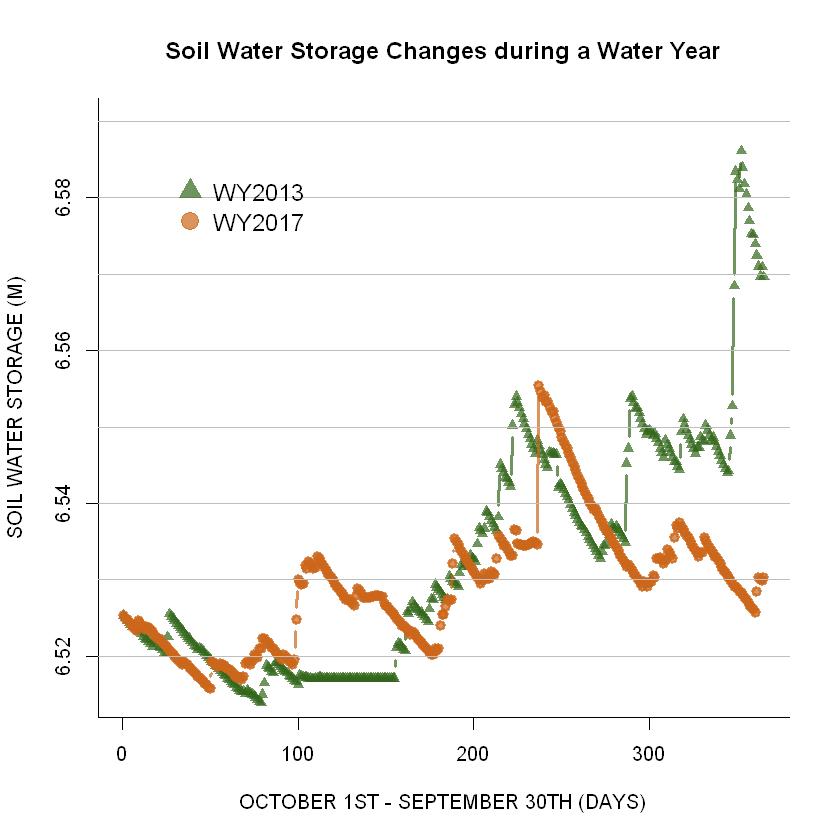

In [71]:
####### No need to make changes to this, SIMPLY RUN THIS CODE #######
# plot the first curve by calling plot() function
# First curve is plotted
plot(WY2013, 
     type="b" , 
     bty="l" , 
     xlab="OCTOBER 1ST - SEPTEMBER 30TH (DAYS)" , 
     ylab="SOIL WATER STORAGE (M)" , 
     col=rgb(0.2,0.4,0.1,0.7) , 
     lwd=3 , pch=17, ylim=c(6.515,6.59) )

# Add second curve to the same plot by calling lines()
lines(WY2017 , 
      col=rgb(0.8,0.4,0.1,0.7) , 
      lwd=3 , pch=19 , type="b" )

abline(h=seq(0,6.59,0.01) , col="grey", lwd=0.8)

# add a title and subtitle
title("Soil Water Storage Changes during a Water Year")

# Add a legend
legend("topleft", 
  legend = c("WY2013", "WY2017"), 
  col = c(rgb(0.2,0.4,0.1,0.7), 
  rgb(0.8,0.4,0.1,0.7)), 
  pch = c(17,19), 
  bty = "n", 
  pt.cex = 2, 
  cex = 1.2, 
  text.col = "black", 
  horiz = F , 
  inset = c(0.1, 0.1))

#### The y-axis denotes the volume of water in the soil, i.e. the soil water storage (m). 

- Soil water storage (SWS) is the amount (volume) of water held in a unit volume of soil at any given time. In three-dimensions, this volume would be something like cubic meters, m<sup>3</sup>. However because the results are from a one-dimensional model, so is the volume.

- SWS is affected by the local soil hydraulic properties, the amount of water infiltrating the soil, and time.

- The model calculates SWS with the following equation:

> __Soil Water Storage (m) = Volumetric Water Content (dimensionless) × Water Table Depth (m)__

### Example problem:
The model results for WY2017 show that at 100 days (sometime in January), the soil water storage value is 6.53 m and the water table depth is around 9.27 m (not shown). Given these two values, __what is the volumetric water content, as a percentage,__ of the unsaturated soil on this day?

> __Soil Water Storage (m) = Volumetric Water Content × Water Table Depth (m)__

> 6.53 m (one-dimensional volume) = Volumetric Water Content × 9.27 m

> 68% = Volumetric Water Content of the unsaturated soil profile on this day

> In words, the volume of water makes up 68% of the volume of soil in which it is contained, at 100 days. As a reference and in contrast, the three SWS peaks for WY2013 indicated an increase in the volume of water up to 87% of the total volume of soi!

## Consider the three SWS peaks for WY2013 over 6.55 m. In what months did these peaks occur?

Let's create a function to find out. 

In R, `functions` are used to logically break our code into simpler parts. Breaking up the code is supposed to make it easier to maintain, understand and view for errors.

### Syntax for Writing Functions in R

> `name_yo_function` <- __`function`__ `(argument)`

>  `{`   `the_statement you wish the function to make`  `}`

- The word `function` is used to declare a `function` in R.
- The `argument` within the parentheses, `()` is optional.
- The statements within the curly braces, `{}`form the __body of the function__. IF the body contains only one expression, these braces are also optional.
- We give this `function` object a name by assigning it a `variable` that we call `name_yo_function`. 

In [72]:
## Example of a function, run this code!
i_have_a_question <- function()
    print("Hello, is it Friday yet??")

i_have_a_question

function()
    print("Hello, is it Friday yet??")

Below, we created a `function` called `who_is_cool()`.

- It takes an argument `pronoun`. Then it prints the result in appropriate format.

- To do so, we use a built-in R function `paste()` which is used to concatenate strings.

- We then call the function `who is cool()` with the actual arguments "You", "We" and "Cats".

- This is how we find out who is cool. Functions don't lie! They take things literally.

In [73]:
who_is_cool <- function(pronoun)
    {
    print(paste(pronoun,"are cool"))
    }

who_is_cool("You")
who_is_cool("We")
who_is_cool("Cats")

[1] "You are cool"
[1] "We are cool"
[1] "Cats are cool"


### To figure out when the three SWS peaks are, we are going to create a function:
Be sure to UPDATE the value in the parentheses at the BOTTOM of the code with the value of interest. 

HINT: The WY2013 peaks in SWS that we are interested in identifying are (225), (290), and (350).

In [74]:
####### No need to make changes to this, SIMPLY RUN THIS CODE #######

which.month <- function(x) {
if (x<31) {
return("October")
}
else if (x<61) {
return("November")
}
else if (x<92) {
return("December")
}
else if (x<123) {
return("January")
}
else if (x<151) {
return("February")
}
else if (x<182) {
return("March")
}
else if (x<212) {
return("April")
}    
else if (x<243) {
return("May")
}
else if (x<273) {
return("June")
}
else if (x<304) {
return("July")
}
else if (x<335) {
return("August")
}  
else if (x<365) {
return("September")
}
else {
return("Uh-oh! You must be thinking of the days on another planet!")
}
}

#Update the value in the parantheses below with the value of interest
print(which.month(10))

[1] "October"


The months that correspond to the WY2013 peaks in SWS are May (225), July (290), and September (350).

#### Okay, now it's time to review and practice what you learned:

# Use what you learned to answer the following questions: _ANSWER KEY_

#### __Q1)__ What happens to pore spaces in the unsaturated zone during heavy rainfall? How is soil water storage affected? 

- During heavy rain, water infiltrates the pore spaces. This causes the volume of water within this volume of soil to increase, thereby increasing soil water storage.

#### __Q2)__  What is soil water storage? Which industry benefits from understanding this concept?

- Soil water storage is the amount of water (volume) stored in the unsaturated zone. The agricultural industry benefits from understanding soil water storage.

#### __Q3)__  Revisit the first function example from above "Hello..". Use it to create your own function letting me know if it is Friday yet. Type it below, make sure it prints out your answer.

In [76]:
# ANSWER KEY CODE

is_it_friday <- function()
    print("I wish! But not Friday yet!")

is_it_friday

function()
    print("I wish! But not Friday yet!")

## Practing your Skills, ANSWER KEY

#### For Q4, follow the instructions below:

- The csv files called `WY2014-R.csv` AND `WY2016-R.csv`.
- Use `read.csv()` to import the csv file from the data folder.
- Use the `str()` to identify its structure.

In [77]:
########## Q4 ANSWER CODE #############
# import `WY2014`
WY2014 <- read.csv("data/WY2014-R.csv", 
                          header = TRUE, sep = ",")

# run the str() function on the data frame to see its structure, 
str(WY2014)

# import `WY2016`
WY2016 <- read.csv("data/WY2016-R.csv", 
                          header = TRUE, sep = ",")

# run the str() function on the data frame to see its structure, 
str(WY2016)

'data.frame':	365 obs. of  2 variables:
 $ DAY   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ VOLUME: num  6.57 6.57 6.57 6.56 6.56 ...
'data.frame':	365 obs. of  2 variables:
 $ DAY   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ VOLUME: num  6.53 6.53 6.53 6.53 6.53 ...


__Q4) How many rows are there ("obs.")? Columns ("variables")? Number of days represented?__

> There are 365 rows and 2 columns. 

> 365 days are represented.

#### __Good!__ Use what you've learned to `plot` WY2013, WY2014, WY2016 and WY2017 on the same graph. Make sure to label the axes and include a legend.

__5) Copy and paste the "FOR PLOTTING" block of code from above, below (see example). Update everything to make sure it runs.__ 

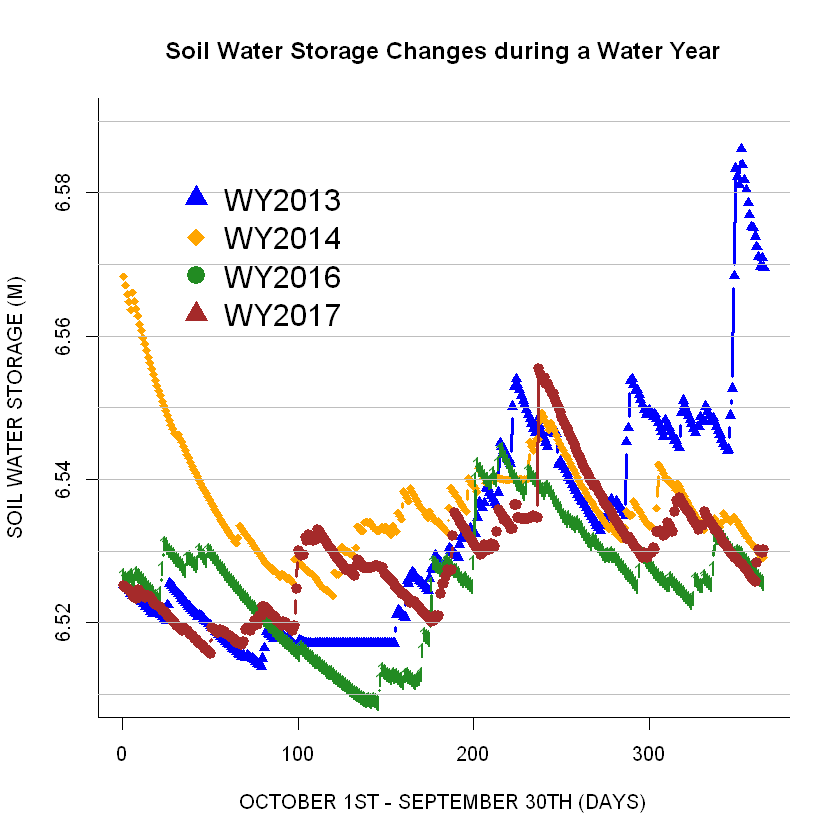

In [78]:
################# Q5 ANSWER CODE ####################
# Make a basic graph

plot(WY2013, 
     type="b" , 
     bty="l" , 
     xlab="OCTOBER 1ST - SEPTEMBER 30TH (DAYS)" , 
     ylab="SOIL WATER STORAGE (M)" , 
     col="blue" , 
     lwd=3 , pch=17, ylim=c(6.51,6.59) )

lines(WY2014,
      col="orange" , 
      lwd=3 , pch=18 , type="b" )

lines(WY2016,
      col="forestgreen" , 
      lwd=3 , pch="18" , type="b" )

lines(WY2017 , 
      col="brown" , 
      lwd=3 , pch=19 , type="b" )

abline(h=seq(0,6.59,0.01) , col="grey", lwd=1)

# add a title and subtitle
title("Soil Water Storage Changes during a Water Year")

# Add a legend
legend("topleft", 
  legend = c("WY2013", "WY2014", "WY2016", "WY2017"), 
  col = c("blue", "orange" , "forestgreen" , "brown"), 
  pch = c(17,18,19), 
  bty = "n", 
  pt.cex = 2, 
  cex = 1.5, 
  text.col = "black", 
  horiz = F , 
  inset = c(0.1, 0.1))

__Q5) Look at the peaks between 200 - 250 days and the troughs between 125 - 175 days. Which seasons do these correspond to? Why might this be?__

HINT: The Boulder Creek Watershed (from which this data is derived) typically gets little precipitation in December and January.

> Use the function below (it's similar to the example) to answer the question.

In [79]:
####### SIMPLY RUN CODE #######

which.season <- function(x) {
if (x<83) {
return("Fall Season")
}
else if (x<175) {
return("Winter Season")
}
else if (x<266) {
return("Spring Season")
}
else if (x<358) {
return("Summer Season")
}
else if (x<365) {
return("Fall Season")
}
else {
return("Uh-oh! You must be thinking of the days on another planet!")
}
}

#Update the value in the parantheses below with the value of interest
print(which.season(300))

[1] "Summer Season"


ANSWER KEY

- The peaks occur in the Spring after snowmelt. 
- The troughs occur in the early Winter. The Boulder Creek Watershed typically sees less precipitation in December and January, leading to less soil moisture storage.

## Final Thoughts

You've now learned that soil water storage in the subsurface is another important reservoir that intermittently stores water on its way to recharge an aquifer. In addition, understanding the increases and decreases in soil water storage helps agriculture managers understand the seasonality of crops.

## Congrats! You're one lesson smarter!

![gw.PNG](gw.PNG)

### References (in order of appearance)

__Subsurface_Figure.__ (2020). Corona, Claudia. Dissertation Work.

__Soil Water Storage.__ (2020). Sharma, Vivek. Irrigation Management: Basics of Soil Water. Department of Plant Sciences, University of Wyoming. Link: http://wyoextension.org/publications/html/B1330/ Accessed: 09/22/20.

__Graphs in R__ 
McCown, Frank. (2020). Producing Simple graphs with R. Link: https://sites.harding.edu/fmccown/r/ Accessed: 10/02/20

__Axis Labels in R__ 
DataMentor (2020). Advanced R barplot customization. Link:https://www.r-graph-gallery.com/210-custom-barplot-layout.html Accessed: 10/03/20.

__Multiple graphs in a Single Plot__ 
DataMentor (2020). R par() function. Link:https://www.datamentor.io/r-programming/subplot/ Accessed: 10/03/20.

__Cute Water Molecules in the Unsaturated Zone__ (2020). KQED Quest. What is Groundwater? https://www.youtube.com/watch?v=oNWAerr_xEEAccessed: 10/03/20.